In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("survey_results_public.csv")

In [43]:
sr = pd.read_csv("survey_results_schema.csv")
sr

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [107]:
salary_exp_df = df.copy()
salary_exp_df= salary_exp_df[salary_exp_df['YearsCodePro'].notna()]
salary_exp_df = salary_exp_df[~salary_exp_df['YearsCodePro'].isin(['Less than 1 year', 'More than 50 years'])]
salary_exp_df['YearsCodePro'] = salary_exp_df['YearsCodePro'].apply(lambda x: '0' if x=='Less than 1 year' else x)
salary_exp_df['YearsCodePro'] = salary_exp_df['YearsCodePro'].apply(lambda x: '50' if x=='More than 50 years' else x)
salary_exp_df['YearsCodePro'] = salary_exp_df['YearsCodePro'].astype('int')
# salary_exp_df = salary_exp_df[['YearsCodePro', 'ConvertedCompYearly', 'DevType']]
# salary_exp_df.dropna(inplace=True)
# salary_exp_df = salary_exp_df.sort_values(by="YearsCodePro")

# len(salary_exp_df['DevType'].unique())
# salary_exp_df[(salary_exp_df['DevType'] == 'Academic researcher')]['YearsCodePro']
# salary_exp_df[(salary_exp_df['DevType'] == 'Academic researcher')]

# round(salary_exp_df[(salary_exp_df['DevType'] == 'Academic researcher')]['YearsCodePro'],2)
# salary_exp_df['YearsCodePro'] = salary_exp_df['YearsCodePro'].astype('int', errors='ignore')
salary_exp_df['DevType'].unique()


array(['Developer, desktop or enterprise applications;Developer, full-stack;Engineer, data;Other (please specify):',
       'Developer, front-end',
       'Data scientist or machine learning specialist', ...,
       'Developer, mobile;Developer, front-end;Developer, full-stack;Developer, back-end;Database administrator;Developer, embedded applications or devices;System administrator;Educator',
       'Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, embedded applications or devices;Engineering manager;Educator',
       'Developer, mobile;Developer, desktop or enterprise applications;Data scientist or machine learning specialist;Developer, back-end;Engineering manager'],
      dtype=object)

In [108]:
# salary_exp_df['DevType'].str.split(';',expand=True)

salary_exp_df["DevType"]=salary_exp_df["DevType"].str.split(";")
salary_exp_df = salary_exp_df.explode("DevType").reset_index(drop=True)
salary_exp_df = salary_exp_df.groupby(['DevType']).agg({'ConvertedCompYearly':np.median, 'YearsCodePro':np.mean,'ResponseId':'size'}).reset_index()
salary_exp_df['YearsCodePro'] = salary_exp_df['YearsCodePro'].apply(lambda x: round(x, 2))
salary_exp_df

,DevType,ConvertedCompYearly,YearsCodePro,ResponseId
0,Academic researcher,51372.0,9.29,2506
1,Data or business analyst,62758.5,11.40,3342
2,Data scientist or machine learning specialist,64859.0,8.92,3772
3,Database administrator,56616.0,12.23,5246
4,Designer,52145.0,11.93,3988
5,DevOps specialist,71093.0,11.26,6752
6,"Developer, QA or test",57599.5,10.55,3310
7,"Developer, back-end",58368.0,9.94,26664
8,"Developer, desktop or enterprise applications",59676.0,12.19,10182
9,"Developer, embedded applications or devices",59454.0,11.62,4211


In [68]:
salary_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6451 entries, 0 to 6450
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DevType              6451 non-null   object 
 1   ConvertedCompYearly  6451 non-null   float64
 2   YearsCodePro         6451 non-null   float64
dtypes: float64(2), object(1)
memory usage: 151.3+ KB


In [38]:
df.groupby('Country').size().reset_index(name="size")

,Country,size
0,Afghanistan,65
1,Albania,73
2,Algeria,46
3,Andorra,12
4,Angola,27
...,...,...
176,"Venezuela, Bolivarian Republic of...",104
177,Viet Nam,386
178,Yemen,20
179,Zambia,22


In [39]:
df.groupby('DevType').size().reset_index(name="size")

,DevType,size
0,Academic researcher,397
1,Academic researcher;Data or business analyst,26
2,Academic researcher;Data or business analyst;D...,1
3,Academic researcher;Data or business analyst;E...,1
4,Academic researcher;Data or business analyst;S...,1
...,...,...
8621,System administrator;Educator,8
8622,System administrator;Marketing or sales profes...,3
8623,System administrator;Product manager,2
8624,System administrator;Product manager;Marketing...,1


In [42]:
dev_type_df = df.copy()
dev_type_df['DevType'].str.split(",",expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Developer,mobile,None,None,None,None,None,None,None,None,None,None,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Developer,front-end,None,None,None,None,None,None,None,None,None,None,None
4,Developer,desktop or enterprise applications;Developer,full-stack;Engineer,data;Other (please specify):,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,Developer,back-end,None,None,None,None,None,None,None,None,None,None,None
83435,Developer,full-stack,None,None,None,None,None,None,None,None,None,None,None
83436,Data scientist or machine learning specialist;...,None,None,None,None,None,None,None,None,None,None,None,None
83437,Developer,back-end,None,None,None,None,None,None,None,None,None,None,None


In [109]:
df['EdLevel'].unique()

array(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Professional degree (JD, MD, etc.)',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       nan], dtype=object)

In [137]:
import networkx as nx
G = nx.Graph()

network_df = df.copy()

network_df = network_df[['WebframeHaveWorkedWith','WebframeWantToWorkWith']]

network_df["WebframeHaveWorkedWith"] = network_df["WebframeHaveWorkedWith"].str.split(";")
network_df = network_df.explode("WebframeHaveWorkedWith").reset_index(drop=True)
network_df

# network_df["WebframeWantToWorkWith"] = network_df["WebframeWantToWorkWith"].str.split(";")
# network_df = network_df.explode("WebframeWantToWorkWith").reset_index(drop=True)

# network_df.dropna(inplace=True)
# G = nx.from_pandas_edgelist(network_df, 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith')

,WebframeHaveWorkedWith,WebframeWantToWorkWith
0,Laravel,NaN
1,Symfony,NaN
2,Angular,NaN
3,Flask,NaN
4,Vue.js,NaN
...,...,...
188945,Express,NaN
188946,Flask,NaN
188947,React.js,NaN
188948,Angular,Express;Laravel;Spring;Symfony


In [138]:
for tech in network_df["WebframeHaveWorkedWith"].unique():
    print(tech)

Laravel
Symfony
Angular
Flask
Vue.js
jQuery
Express
React.js
Angular.js
Ruby on Rails
Django
FastAPI
nan
ASP.NET Core 
Spring
Svelte
ASP.NET
Gatsby
Drupal


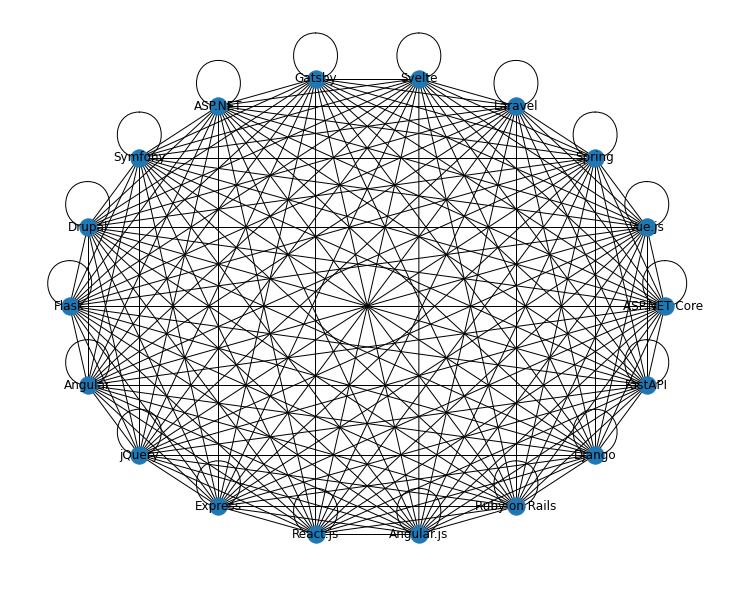

In [125]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [128]:
G.edges()

EdgeView([('Flask', 'Flask'), ('Flask', 'Express'), ('Flask', 'jQuery'), ('Flask', 'React.js'), ('Flask', 'Vue.js'), ('Flask', 'Angular'), ('Flask', 'Svelte'), ('Flask', 'FastAPI'), ('Flask', 'Django'), ('Flask', 'Spring'), ('Flask', 'ASP.NET'), ('Flask', 'ASP.NET Core '), ('Flask', 'Angular.js'), ('Flask', 'Ruby on Rails'), ('Flask', 'Laravel'), ('Flask', 'Symfony'), ('Flask', 'Drupal'), ('Flask', 'Gatsby'), ('Angular', 'Angular'), ('Angular', 'jQuery'), ('Angular', 'ASP.NET Core '), ('Angular', 'Spring'), ('Angular', 'Express'), ('Angular', 'React.js'), ('Angular', 'Angular.js'), ('Angular', 'Laravel'), ('Angular', 'Vue.js'), ('Angular', 'Django'), ('Angular', 'Gatsby'), ('Angular', 'Svelte'), ('Angular', 'ASP.NET'), ('Angular', 'Symfony'), ('Angular', 'Ruby on Rails'), ('Angular', 'Drupal'), ('Angular', 'FastAPI'), ('jQuery', 'jQuery'), ('jQuery', 'Express'), ('jQuery', 'React.js'), ('jQuery', 'Ruby on Rails'), ('jQuery', 'Laravel'), ('jQuery', 'Angular.js'), ('jQuery', 'Gatsby'), (

In [15]:
interest_df = df.copy()

interest_df["PlatformHaveWorkedWith"] = interest_df["PlatformHaveWorkedWith"].str.split(";")
interest_df = interest_df.explode("PlatformHaveWorkedWith").reset_index(drop=True)
interest_df[interest_df['PlatformHaveWorkedWith'].notnull()]['PlatformHaveWorkedWith'].unique()

array(['Heroku', 'Microsoft Azure', 'AWS', 'Google Cloud Platform',
       'DigitalOcean', 'Oracle Cloud Infrastructure',
       'IBM Cloud or Watson'], dtype=object)

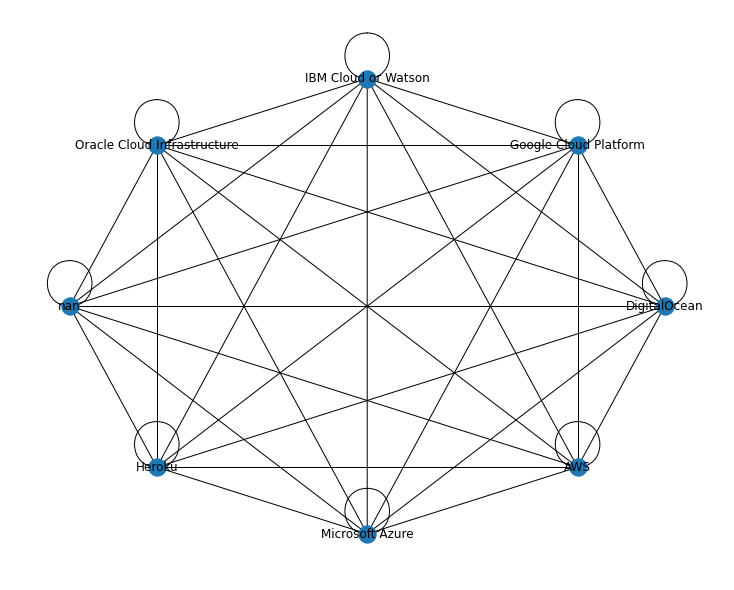

In [17]:
import networkx as nx
from matplotlib.pyplot import figure

# G = nx.Graph()

network_df = df.copy()

network_df = network_df[['PlatformHaveWorkedWith','PlatformWantToWorkWith']]

network_df["PlatformHaveWorkedWith"] = network_df["PlatformHaveWorkedWith"].str.split(";")
network_df = network_df.explode("PlatformHaveWorkedWith").reset_index(drop=True)

network_df["PlatformWantToWorkWith"] = network_df["PlatformWantToWorkWith"].str.split(";")
network_df = network_df.explode("PlatformWantToWorkWith").reset_index(drop=True)


G = nx.from_pandas_edgelist(network_df, 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith')

figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)


In [53]:
def map_gender(x):
    return x if x in ['Man', 'Woman'] else "Prefer not to say"


def map_experience(x):
    if x == 'Less than 1 year':
        return 1
    elif x == 'More than 50 years':
        return 50
    return x





salary_by_gender = df.copy()
salary_by_gender['Gender'] = salary_by_gender['Gender'].apply(map_gender)
salary_by_gender['YearsCodePro'] = salary_by_gender['YearsCodePro'].apply(map_experience)
salary_by_gender['YearsCodePro'] = salary_by_gender['YearsCodePro'].fillna("0")
salary_by_gender['YearsCodePro'] = salary_by_gender['YearsCodePro'].astype('int')
# salary_by_gender.dropna(inplace=True)

In [74]:
# new_df = salary_by_gender.groupby(['Gender', 'YearsCodePro']).agg({'YearsCodePro':'mean', 'ConvertedCompYearly':'median'}).reset_index(drop=True)

new_df = salary_by_gender.groupby(['Gender', 'YearsCodePro']).agg({'YearsCodePro':'mean', 'ConvertedCompYearly':'median'})
new_df['Gender'] = new_df.index.get_level_values(0)
new_df.head()
new_df.reset_index(drop=True)
new_df.head()


YearsCodePro  ConvertedCompYearly Gender
Gender YearsCodePro                                          
Man    0                      0.0              34980.0    Man
       1                      1.0              20000.0    Man
       2                      2.0              27552.0    Man
       3                      3.0              35028.0    Man
       4                      4.0              41166.5    Man